<a href="https://colab.research.google.com/github/xqyn/modeling/blob/main/claude_langevin_equation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

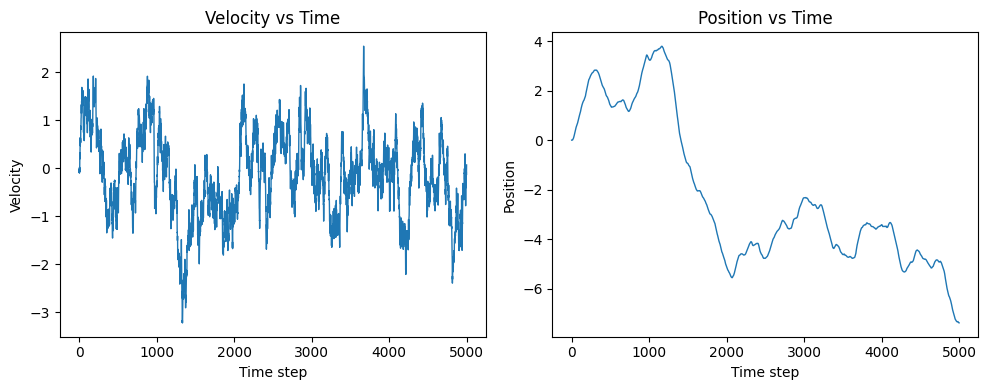

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0             # mass
gamma = 1.0         # friction coefficient
kB = 1.0            # Boltzmann constant
T = 1.0             # temperature
dt = 0.01           # time step
steps = 5000        # number of steps

# Initialize arrays
v = np.zeros(steps)  # velocity
x = np.zeros(steps)  # position

# Noise strength
sigma = np.sqrt(2 * gamma * kB * T / m)

# Simulation loop (Euler-Maruyama)
for i in range(steps-1):
    # random term (Gaussian noise)
    noise = sigma * np.sqrt(dt) * np.random.randn()

    # Update velocity from Langevin equation
    v[i+1] = v[i] + (-gamma/m * v[i] * dt + noise)

    # Update position
    x[i+1] = x[i] + v[i] * dt

# Plot results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(v, lw=1)
plt.title("Velocity vs Time")
plt.xlabel("Time step")
plt.ylabel("Velocity")

plt.subplot(1,2,2)
plt.plot(x, lw=1)
plt.title("Position vs Time")
plt.xlabel("Time step")
plt.ylabel("Position")

plt.tight_layout()
plt.show()


Langevin Equation Simulator

The Langevin equation describes Brownian motion:
m * dv/dt = -γv + F(x) + ξ(t)

where:
  - γ: friction coefficient
  - F(x): deterministic force
  - ξ(t): random thermal force
  - Noise strength satisfies: <ξ(t)ξ(t')> = 2γk_BT*m*δ(t-t')

Generating trajectory plots...


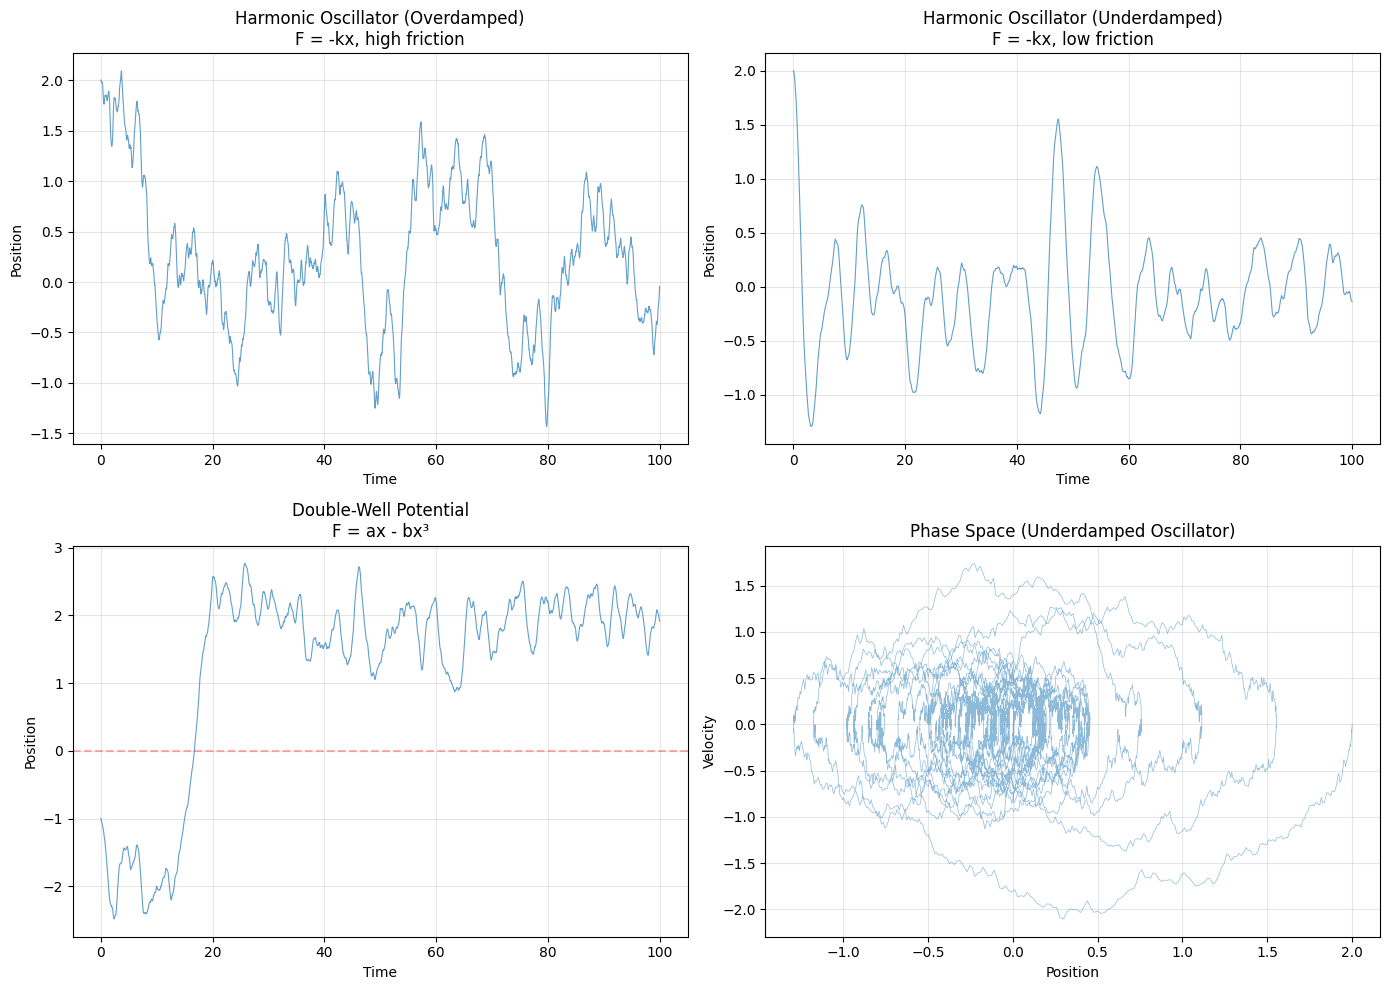


Generating temperature effect plots...


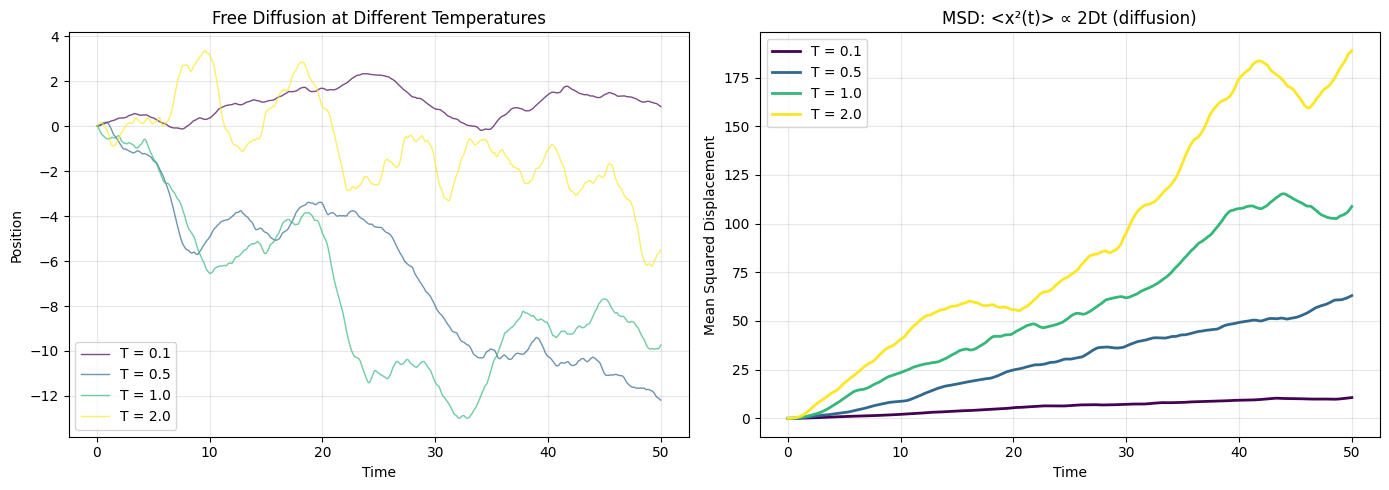


Done!


In [2]:
import numpy as np
import matplotlib.pyplot as plt

class LangevinSimulator:
    """
    Simulates the Langevin equation: m*dv/dt = -γv + F(x) + ξ(t)
    where:
    - m: mass
    - γ: friction coefficient
    - F(x): deterministic force
    - ξ(t): random thermal force
    """

    def __init__(self, mass=1.0, gamma=1.0, temperature=1.0, dt=0.01):
        self.m = mass
        self.gamma = gamma
        self.kT = temperature  # k_B * T
        self.dt = dt

        # Calculate noise strength from fluctuation-dissipation theorem
        self.D = np.sqrt(2 * gamma * self.kT * self.m / dt)

    def harmonic_force(self, x, k=1.0):
        """Harmonic potential force: F = -kx"""
        return -k * x

    def double_well_force(self, x, a=1.0, b=1.0):
        """Double-well potential force: F = ax - bx³"""
        return a * x - b * x**3

    def simulate(self, n_steps, x0=0.0, v0=0.0, force_func=None, **force_params):
        """
        Simulate particle trajectory using Euler-Maruyama method
        """
        if force_func is None:
            force_func = self.harmonic_force

        # Initialize arrays
        x = np.zeros(n_steps)
        v = np.zeros(n_steps)
        x[0], v[0] = x0, v0

        # Time evolution
        for i in range(1, n_steps):
            # Random force (white noise)
            xi = np.random.normal(0, self.D)

            # Deterministic force
            F_det = force_func(x[i-1], **force_params)

            # Update velocity: dv = (-γv + F + ξ)/m * dt
            dv = (-self.gamma * v[i-1] + F_det + xi) / self.m * self.dt
            v[i] = v[i-1] + dv

            # Update position: dx = v * dt
            x[i] = x[i-1] + v[i] * self.dt

        return x, v


def plot_trajectories():
    """Plot multiple trajectories in different potentials"""

    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Simulation parameters
    n_steps = 10000
    dt = 0.01
    time = np.arange(n_steps) * dt

    # 1. Harmonic oscillator (overdamped)
    sim1 = LangevinSimulator(mass=1.0, gamma=5.0, temperature=0.5, dt=dt)
    x1, v1 = sim1.simulate(n_steps, x0=2.0, force_func=sim1.harmonic_force, k=1.0)

    axes[0, 0].plot(time, x1, linewidth=0.8, alpha=0.7)
    axes[0, 0].set_xlabel('Time')
    axes[0, 0].set_ylabel('Position')
    axes[0, 0].set_title('Harmonic Oscillator (Overdamped)\nF = -kx, high friction')
    axes[0, 0].grid(True, alpha=0.3)

    # 2. Harmonic oscillator (underdamped)
    sim2 = LangevinSimulator(mass=1.0, gamma=0.5, temperature=0.2, dt=dt)
    x2, v2 = sim2.simulate(n_steps, x0=2.0, force_func=sim2.harmonic_force, k=1.0)

    axes[0, 1].plot(time, x2, linewidth=0.8, alpha=0.7)
    axes[0, 1].set_xlabel('Time')
    axes[0, 1].set_ylabel('Position')
    axes[0, 1].set_title('Harmonic Oscillator (Underdamped)\nF = -kx, low friction')
    axes[0, 1].grid(True, alpha=0.3)

    # 3. Double-well potential
    sim3 = LangevinSimulator(mass=1.0, gamma=2.0, temperature=0.3, dt=dt)
    x3, v3 = sim3.simulate(n_steps, x0=-1.0, force_func=sim3.double_well_force,
                           a=1.0, b=0.25)

    axes[1, 0].plot(time, x3, linewidth=0.8, alpha=0.7)
    axes[1, 0].set_xlabel('Time')
    axes[1, 0].set_ylabel('Position')
    axes[1, 0].set_title('Double-Well Potential\nF = ax - bx³')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].axhline(y=0, color='r', linestyle='--', alpha=0.3)

    # 4. Phase space trajectory (harmonic oscillator)
    axes[1, 1].plot(x2, v2, linewidth=0.5, alpha=0.5)
    axes[1, 1].set_xlabel('Position')
    axes[1, 1].set_ylabel('Velocity')
    axes[1, 1].set_title('Phase Space (Underdamped Oscillator)')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_temperature_effect():
    """Demonstrate effect of temperature on diffusion"""

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    n_steps = 5000
    dt = 0.01
    time = np.arange(n_steps) * dt

    temperatures = [0.1, 0.5, 1.0, 2.0]
    colors = plt.cm.viridis(np.linspace(0, 1, len(temperatures)))

    # Free diffusion (no external force)
    for temp, color in zip(temperatures, colors):
        sim = LangevinSimulator(mass=1.0, gamma=1.0, temperature=temp, dt=dt)
        x, v = sim.simulate(n_steps, x0=0.0, force_func=lambda x: 0.0)
        axes[0].plot(time, x, linewidth=1, alpha=0.7, color=color,
                    label=f'T = {temp}')

    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Position')
    axes[0].set_title('Free Diffusion at Different Temperatures')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)

    # Mean squared displacement
    n_trajectories = 50
    for temp, color in zip(temperatures, colors):
        msd = np.zeros(n_steps)
        sim = LangevinSimulator(mass=1.0, gamma=1.0, temperature=temp, dt=dt)

        for _ in range(n_trajectories):
            x, v = sim.simulate(n_steps, x0=0.0, force_func=lambda x: 0.0)
            msd += x**2

        msd /= n_trajectories
        axes[1].plot(time, msd, linewidth=2, color=color, label=f'T = {temp}')

    axes[1].set_xlabel('Time')
    axes[1].set_ylabel('Mean Squared Displacement')
    axes[1].set_title('MSD: <x²(t)> ∝ 2Dt (diffusion)')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    print("Langevin Equation Simulator")
    print("=" * 50)
    print("\nThe Langevin equation describes Brownian motion:")
    print("m * dv/dt = -γv + F(x) + ξ(t)")
    print("\nwhere:")
    print("  - γ: friction coefficient")
    print("  - F(x): deterministic force")
    print("  - ξ(t): random thermal force")
    print("  - Noise strength satisfies: <ξ(t)ξ(t')> = 2γk_BT*m*δ(t-t')")
    print("=" * 50)

    print("\nGenerating trajectory plots...")
    plot_trajectories()

    print("\nGenerating temperature effect plots...")
    plot_temperature_effect()

    print("\nDone!")

Stochastic Cell Fate Decision Model

Modeling gene regulatory networks with expression noise:
  dx/dt = -∇U(x) + ξ(t)

where:
  - U(x): Potential landscape (Waddington's landscape)
  - ∇U(x): Deterministic gene regulation
  - ξ(t): Stochastic gene expression noise

Biological interpretation:
  - Minima = Stable cell fates (attractors)
  - Barriers = Energy required for fate transitions
  - Noise = Intrinsic/extrinsic fluctuations in gene expression

1. Bistable landscape and fate commitment...


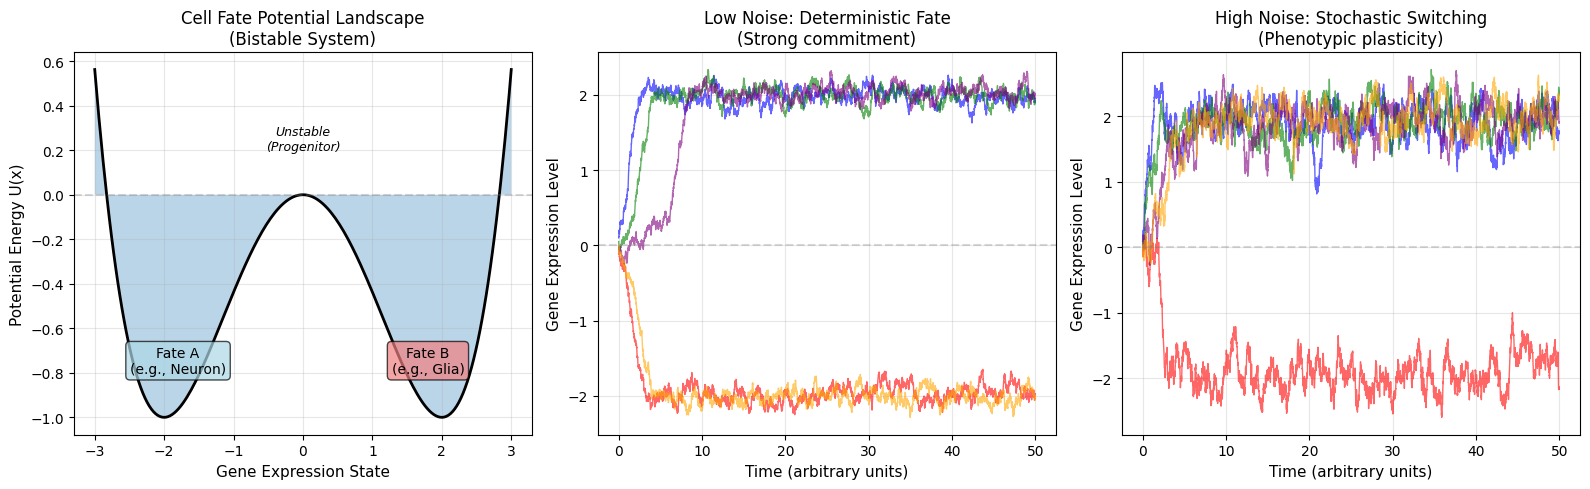


2. Gene regulatory toggle switch (2D)...


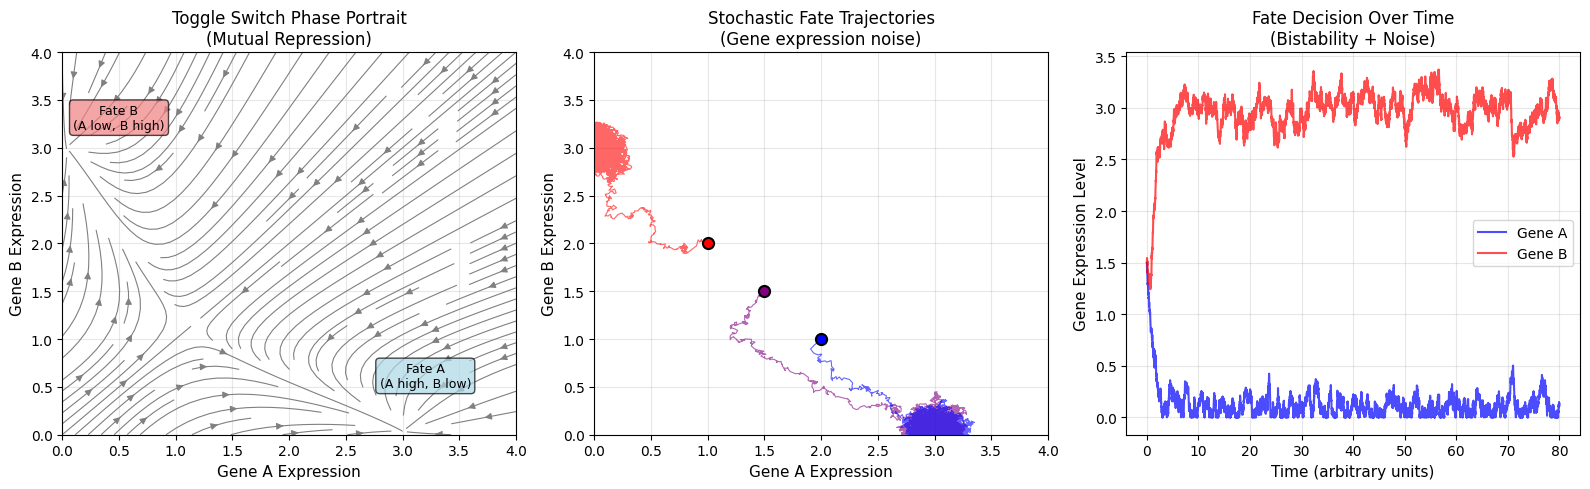


3. Fate probability analysis...


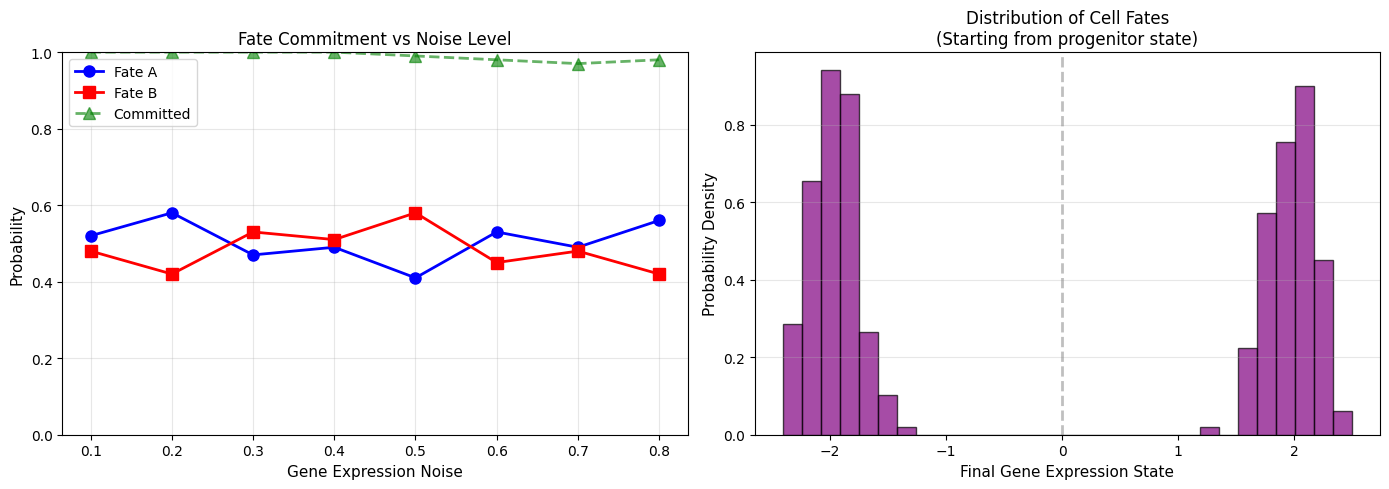


Done! All visualizations complete.


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

class CellFateModel:
    """
    Stochastic model for cell fate decisions using Langevin dynamics.
    Models gene regulatory networks with noise in gene expression.

    The model: dx/dt = -∇U(x) + ξ(t)
    where U(x) is the potential landscape and ξ represents gene expression noise
    """

    def __init__(self, noise_strength=0.5, dt=0.01):
        self.noise_strength = noise_strength
        self.dt = dt

    def bistable_potential(self, x, a=1.0, b=0.25):
        """
        Bistable potential representing two stable cell fates.
        U(x) = -0.5*a*x² + 0.25*b*x⁴
        Two minima represent differentiated states (e.g., neuron vs glia)
        """
        return -0.5 * a * x**2 + 0.25 * b * x**4

    def bistable_force(self, x, a=1.0, b=0.25):
        """Gradient of bistable potential: F = -dU/dx = ax - bx³"""
        return a * x - b * x**3

    def tristable_potential(self, x, y):
        """
        2D potential landscape with three stable states.
        Models scenarios like: stem cell -> (progenitor) -> two differentiated types
        """
        U = -3*x**2 - 3*y**2 + x**4 + y**4 + 0.5*x**2*y**2
        return U

    def tristable_force(self, state):
        """Gradient of tristable potential"""
        x, y = state
        fx = -6*x + 4*x**3 + x*y**2
        fy = -6*y + 4*y**3 + x**2*y
        return np.array([fx, fy])

    def gene_toggle_switch(self, state, alpha=3.0, beta=3.0, n=4):
        """
        Classic gene regulatory toggle switch (mutual repression).
        Two genes A and B that repress each other.

        dA/dt = α/(1+B^n) - A
        dB/dt = β/(1+A^n) - B
        """
        A, B = state
        dA = alpha / (1 + B**n) - A
        dB = beta / (1 + A**n) - B
        return np.array([dA, dB])

    def simulate_1D(self, n_steps, x0=0.0, force_func=None, **params):
        """Simulate 1D cell fate trajectory"""
        if force_func is None:
            force_func = self.bistable_force

        x = np.zeros(n_steps)
        x[0] = x0

        for i in range(1, n_steps):
            # Deterministic drift
            F = force_func(x[i-1], **params)

            # Gene expression noise (intrinsic + extrinsic)
            noise = np.random.normal(0, self.noise_strength)

            # Update
            x[i] = x[i-1] + F * self.dt + noise * np.sqrt(self.dt)

        return x

    def simulate_2D(self, n_steps, state0=None, force_func=None, **params):
        """Simulate 2D cell fate trajectory (e.g., two master regulators)"""
        if state0 is None:
            state0 = np.array([0.0, 0.0])
        if force_func is None:
            force_func = self.gene_toggle_switch

        states = np.zeros((n_steps, 2))
        states[0] = state0

        for i in range(1, n_steps):
            # Deterministic dynamics
            F = force_func(states[i-1], **params)

            # Correlated noise in gene expression
            noise = np.random.normal(0, self.noise_strength, size=2)

            # Update
            states[i] = states[i-1] + F * self.dt + noise * np.sqrt(self.dt)

            # Keep states positive (gene expression levels)
            states[i] = np.clip(states[i], 0.0, None)

        return states


def plot_bistable_landscape():
    """Visualize bistable potential and cell fate trajectories"""

    fig = plt.figure(figsize=(16, 5))

    # Create potential landscape
    x_range = np.linspace(-3, 3, 200)
    model = CellFateModel(noise_strength=0.3, dt=0.01)
    U = model.bistable_potential(x_range, a=1.0, b=0.25)

    # Subplot 1: Potential landscape
    ax1 = plt.subplot(131)
    ax1.plot(x_range, U, 'k-', linewidth=2)
    ax1.fill_between(x_range, U, alpha=0.3)
    ax1.set_xlabel('Gene Expression State', fontsize=11)
    ax1.set_ylabel('Potential Energy U(x)', fontsize=11)
    ax1.set_title('Cell Fate Potential Landscape\n(Bistable System)', fontsize=12)
    ax1.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    ax1.text(-1.8, -0.8, 'Fate A\n(e.g., Neuron)', ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    ax1.text(1.8, -0.8, 'Fate B\n(e.g., Glia)', ha='center', fontsize=10,
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    ax1.text(0, 0.2, 'Unstable\n(Progenitor)', ha='center', fontsize=9, style='italic')
    ax1.grid(True, alpha=0.3)

    # Subplot 2: Low noise - commitment to one fate
    ax2 = plt.subplot(132)
    n_steps = 5000
    time = np.arange(n_steps) * 0.01

    model_low = CellFateModel(noise_strength=0.2, dt=0.01)
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    x0_vals = [0.1, -0.1, 0.05, -0.05, 0.0]

    for x0, color in zip(x0_vals, colors):
        traj = model_low.simulate_1D(n_steps, x0=x0)
        ax2.plot(time, traj, linewidth=1, alpha=0.6, color=color)

    ax2.set_xlabel('Time (arbitrary units)', fontsize=11)
    ax2.set_ylabel('Gene Expression Level', fontsize=11)
    ax2.set_title('Low Noise: Deterministic Fate\n(Strong commitment)', fontsize=12)
    ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    ax2.grid(True, alpha=0.3)

    # Subplot 3: High noise - stochastic fate switching
    ax3 = plt.subplot(133)
    model_high = CellFateModel(noise_strength=0.5, dt=0.01)

    for x0, color in zip(x0_vals, colors):
        traj = model_high.simulate_1D(n_steps, x0=x0)
        ax3.plot(time, traj, linewidth=1, alpha=0.6, color=color)

    ax3.set_xlabel('Time (arbitrary units)', fontsize=11)
    ax3.set_ylabel('Gene Expression Level', fontsize=11)
    ax3.set_title('High Noise: Stochastic Switching\n(Phenotypic plasticity)', fontsize=12)
    ax3.axhline(y=0, color='gray', linestyle='--', alpha=0.3)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_gene_toggle_switch():
    """Visualize 2D gene regulatory toggle switch"""

    fig = plt.figure(figsize=(16, 5))

    # Subplot 1: Phase portrait with nullclines
    ax1 = plt.subplot(131)

    A_range = np.linspace(0, 4, 30)
    B_range = np.linspace(0, 4, 30)
    A_grid, B_grid = np.meshgrid(A_range, B_range)

    model = CellFateModel(noise_strength=0.0, dt=0.01)

    # Calculate vector field
    dA = np.zeros_like(A_grid)
    dB = np.zeros_like(B_grid)

    for i in range(len(A_range)):
        for j in range(len(B_range)):
            state = np.array([A_grid[j, i], B_grid[j, i]])
            F = model.gene_toggle_switch(state, alpha=3.0, beta=3.0, n=4)
            dA[j, i] = F[0]
            dB[j, i] = F[1]

    # Plot streamlines
    ax1.streamplot(A_grid, B_grid, dA, dB, color='gray', density=1.2, linewidth=0.8)
    ax1.set_xlabel('Gene A Expression', fontsize=11)
    ax1.set_ylabel('Gene B Expression', fontsize=11)
    ax1.set_title('Toggle Switch Phase Portrait\n(Mutual Repression)', fontsize=12)
    ax1.text(3.2, 0.5, 'Fate A\n(A high, B low)', ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    ax1.text(0.5, 3.2, 'Fate B\n(A low, B high)', ha='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.7))
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 4)
    ax1.set_ylim(0, 4)

    # Subplot 2: Stochastic trajectories
    ax2 = plt.subplot(132)

    model_stoch = CellFateModel(noise_strength=0.15, dt=0.01)
    n_steps = 10000

    initial_states = [
        np.array([1.5, 1.5]),  # Near unstable point
        np.array([2.0, 1.0]),
        np.array([1.0, 2.0])
    ]
    colors = ['purple', 'blue', 'red']

    for state0, color in zip(initial_states, colors):
        traj = model_stoch.simulate_2D(n_steps, state0=state0)
        ax2.plot(traj[:, 0], traj[:, 1], linewidth=0.8, alpha=0.6, color=color)
        ax2.plot(state0[0], state0[1], 'o', markersize=8, color=color,
                markeredgecolor='black', markeredgewidth=1.5)

    ax2.set_xlabel('Gene A Expression', fontsize=11)
    ax2.set_ylabel('Gene B Expression', fontsize=11)
    ax2.set_title('Stochastic Fate Trajectories\n(Gene expression noise)', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.set_xlim(0, 4)
    ax2.set_ylim(0, 4)

    # Subplot 3: Time series for one trajectory
    ax3 = plt.subplot(133)

    model_ts = CellFateModel(noise_strength=0.2, dt=0.01)
    n_steps = 8000
    time = np.arange(n_steps) * 0.01

    traj = model_ts.simulate_2D(n_steps, state0=np.array([1.5, 1.5]))

    ax3.plot(time, traj[:, 0], linewidth=1.5, alpha=0.7, label='Gene A', color='blue')
    ax3.plot(time, traj[:, 1], linewidth=1.5, alpha=0.7, label='Gene B', color='red')
    ax3.set_xlabel('Time (arbitrary units)', fontsize=11)
    ax3.set_ylabel('Gene Expression Level', fontsize=11)
    ax3.set_title('Fate Decision Over Time\n(Bistability + Noise)', fontsize=12)
    ax3.legend(loc='best', fontsize=10)
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


def plot_fate_probability():
    """Analyze fate decision probabilities with noise"""

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Test different noise levels
    noise_levels = np.linspace(0.1, 0.8, 8)
    n_trials = 100
    n_steps = 5000

    fate_A_prob = []
    fate_B_prob = []

    for noise in noise_levels:
        model = CellFateModel(noise_strength=noise, dt=0.01)
        count_A = 0
        count_B = 0

        for _ in range(n_trials):
            traj = model.simulate_1D(n_steps, x0=0.0)
            final_state = traj[-1]

            if final_state > 1.0:
                count_B += 1
            elif final_state < -1.0:
                count_A += 1

        fate_A_prob.append(count_A / n_trials)
        fate_B_prob.append(count_B / n_trials)

    # Plot fate probabilities
    axes[0].plot(noise_levels, fate_A_prob, 'o-', linewidth=2, markersize=8,
                label='Fate A', color='blue')
    axes[0].plot(noise_levels, fate_B_prob, 's-', linewidth=2, markersize=8,
                label='Fate B', color='red')
    axes[0].plot(noise_levels, np.array(fate_A_prob) + np.array(fate_B_prob),
                '^--', linewidth=2, markersize=8, label='Committed', color='green', alpha=0.6)
    axes[0].set_xlabel('Gene Expression Noise', fontsize=11)
    axes[0].set_ylabel('Probability', fontsize=11)
    axes[0].set_title('Fate Commitment vs Noise Level', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    axes[0].set_ylim(0, 1)

    # Distribution of final states
    model_dist = CellFateModel(noise_strength=0.4, dt=0.01)
    final_states = []

    for _ in range(300):
        traj = model_dist.simulate_1D(n_steps, x0=0.0)
        final_states.append(traj[-1])

    axes[1].hist(final_states, bins=30, density=True, alpha=0.7,
                color='purple', edgecolor='black')
    axes[1].set_xlabel('Final Gene Expression State', fontsize=11)
    axes[1].set_ylabel('Probability Density', fontsize=11)
    axes[1].set_title('Distribution of Cell Fates\n(Starting from progenitor state)', fontsize=12)
    axes[1].axvline(x=0, color='gray', linestyle='--', linewidth=2, alpha=0.5)
    axes[1].grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    print("Stochastic Cell Fate Decision Model")
    print("=" * 70)
    print("\nModeling gene regulatory networks with expression noise:")
    print("  dx/dt = -∇U(x) + ξ(t)")
    print("\nwhere:")
    print("  - U(x): Potential landscape (Waddington's landscape)")
    print("  - ∇U(x): Deterministic gene regulation")
    print("  - ξ(t): Stochastic gene expression noise")
    print("\nBiological interpretation:")
    print("  - Minima = Stable cell fates (attractors)")
    print("  - Barriers = Energy required for fate transitions")
    print("  - Noise = Intrinsic/extrinsic fluctuations in gene expression")
    print("=" * 70)

    print("\n1. Bistable landscape and fate commitment...")
    plot_bistable_landscape()

    print("\n2. Gene regulatory toggle switch (2D)...")
    plot_gene_toggle_switch()

    print("\n3. Fate probability analysis...")
    plot_fate_probability()

    print("\nDone! All visualizations complete.")